<!--
# Warum RNNs?

* Sequenz von Daten verabreiten
* Beim lesen eines Satzes fängt der Mensch auch nicht beim jedem Wort komplett von vorne an
* Man verbindet die Wörter
* Man hat das Wissen was vorher war
* GENAU HIER setzen RNNs an
* Zellzustände von vorherigen Aussagen können die aktuelle Aussage beeinflussen 
-->

# Independent Coursework 1: Sequence Learning Algorithmen

__WICHTIG__: Bitte lokal auf einem jupyter Server betrachten, __nicht__ die GitLab Webview verwenden. GitLab stellt jupyter Notebooks nicht korrekt dar.

# 1 Motivation
<br />

<div style="text-align: justify">
Die Motivation für dieses ICW und der Grund warum Recurrent Neural Networks (__RNN__) beim [Neurorace Projekt](https://gitlab.com/NeuroRace) zum Einsatz kommen sollen ist, dass diese Netzart alte Ausgaben, altes Wissen verwendet kann um neue Vorhersagen zu treffen. Das bedeutet, dass das Wissen sich z.B. gerade in einer Linkskurve zu befinden, einen gewissen Einfluss auf die weiteren Ausgaben des Netzes hat. Die "normalen" neuronalen Netze, die aktuell im Neurorace Projekt in Verwendung sind, entscheiden bei jedem Einzelbild komplett unabhängig und neu was nun zu tun ist. Das heißt sie entscheiden immer nur für diesen jeweiligen Moment und nicht anhand vorheriger Zustände/Entscheidungen. Zu entnehmen der folgenden Abbildung:
</div>  

![Zeitunabhängige Entscheidung](images/Zeit_unabhängig.png)
<br />

<div style="text-align: justify">
Jede einzelne Ausgabe des Netzes ist eine Momentaussage zur aktuellen Kameraufnahme. Das Netz weiß nicht ob es gerade schon nach links gelenkt hat und entscheidet zu jedem Zeitpunkt vollkommen neu und unabhängig voneinander. Als Beispiel dafür soll die folgende GIF dienen:
</div>  


![Sim_drive](images/sim_drive_real.gif)
<br />


<div style="text-align: justify">
Der hellblaue Pfeil stellt die Ausgabe eines neuronalen Netzes dar, der grüne Pfeil den wahren Wert der Datenaufnahme, also das dazugehörige Label. Zu erkennen ist, dass das neuronale Netz das Ganze als Regressionsproblem löst und daher immer eine Art Mittelwert zur jeweiligen Aufnahme ausgibt. Gerade in den Kurven ist dies sehr gut zu erkennen. Es entscheidet zu jedem Zeitpunkt ohne Wissen was vorher war, wohingegen die Label-Werte schon recht sprunghafte Werte enthalten, damit die Kurve eben doch noch ausgefahren werden kann. Gerade das Fahren nach Mittelwerten kann bei Kurven zu großen Problemen führen und dafür sorgen, dass eben doch gegen die Wand gefahren wird. 
</div>

<br />

<div style="text-align: justify">
RNNs sollen nun im Neurorace Projekt dabei helfen eine Art Gedächtnis in das neuronale Netz einzubauen. Hierbei sollen die Entscheidungen eines neuronalen Netzes nicht nur darauf basieren was jetzt gerade die Eingabe war, sondern auch darauf was vorher war. Im Neurorace Projekt sollen die Steuerungsausgaben des Netzes für den mobilen Roboter also nicht nur anhand der aktuellen Momentaufnahme entstehen. Das RNN soll eine Sequenz von Eingabedaten, hier z.B. die Kameraaufnahmen, verarbeiten und eine Entscheidung treffen. Dieser Zusammenhang kann der folgenden Abbildung entnommen werden:
</div>

![Zeitabhängige Entscheidung](images/Zeit_abhängig.png) 
<br />

<div style="text-align: justify">
Dies ist ein Beispiel für die Verarbeitung von sequenziellen Daten und ein Grund warum RNNs entwickelt wurden. Auch dient dieser Sachverhalt als Motivation für dieses ICW, das Wissen zu sequenziellem Lernen muss erarbeitet werden um es dann in das Neurorace Projekt einzubauen.
</div>

---

# 2 Einleitung

## 2.1 Warum Sequence Models?
<br>

<div style="text-align: justify">
Einer der Hauptgründe Sequence Models zu nutzen ist es einen echten Nutzen aus vorliegenden sequenziellen Daten ziehen zu können (die aktuellen Trainingsdaten sind alle eine Sequenz einer Fahrt/Strecke). Um das zu können, muss das künstliche neuronale Netz dieses sequenzielle Wissen irgendwie abbilden können. Es muss darauf ausgelegt sein sequenzielle Daten zu verarbeiten. Genau wie z.B. Convolutional Neural Networks (CNNs) gut dafür geeignet sind Bilder zu verarbeiten, so benötigt man auch eine besondere Art von neuronalen Netzen, welche sequenzielle Daten verarbeiten können. Das Besondere an sequenziellen Daten ist, dass die einzelnen Datenpunkte aufeinander aufbauend agieren. Ein folgender Datenpunkt "nutzt" das Wissen, die Aussage, eines Vorherigen um darauf aufbauend eine weitere Aussage zu treffen. Diese Wissensübertragung kann evtl. durch rückgekoppelte Verbindungen oder sogar auch "vorgekoppelte", gemeint sind Verbindungen zu Ereignissen aus der Zukunft, passieren. Dies soll bedeuten, dass zukünftiges Wissen auch Einfluss auf vergangenes Wissen nehmen kann. Genau hierfür wurden Recurrent Neural Networks (RNNs) entwickelt. Sie sind dafür ausgelegt sequenzielle Daten abzubilden. Sie helfen dabei Wissen von früheren oder auch zukünftigen Aussagen zu einem anderen Zeitpunkt zu nutzen. Man spricht hier gerne davon, dass die Zeit ins neuronale Netz Einzug erhält.
<br>[[NG18a]](https://www.coursera.org/lecture/nlp-sequence-models/why-sequence-models-0h7gT)
</div>

## 2.2 Einsatzgebiete
<br>

<div style="text-align: justify">
Eingesetzt werden Sequence Models überall dort, wo auch sequenzielle Daten anfallen und verwendet werden. 
</div>

* <div style="text-align: justify">Natural language processing: Hier werden z.B. Audiodaten in Textdaten umgewandelt. </div>

* <div style="text-align: justify">Music generation: Also die algorithmische Komposition von Musik, aus z.B. einer einzelnen Zahl, die das Genre angibt, wird ein neues Musikstück komponiert/generiert.</div>

* <div style="text-align: justify">Machine translation: Ein französicher Satz wird mit Hilfe von Sequence Models in einen englischen Satz übersetzt.</div>

* <div style="text-align: justify">Video activity recognition: Hier wird eine Folge von Bildern verarbeitet und analysiert, um aussagen zu können, was auf diesen Bildern gerade passiert. Ein Beispiel wäre, dass eine Folge von Bildern analysiert wird um dann die Aussage treffen zu können das diese Folge einen Menschen beim Rennen zeigen.</div>

* <div style="text-align: justify">Name entity recognition: Dies beschreibt die Möglichkeit Namen von Menschen aus einem Text filtern zu können.</div>
[[NG18a]](https://www.coursera.org/lecture/nlp-sequence-models/why-sequence-models-0h7gT)
<br>

<div style="text-align: justify">
Anhand dieser Aufzählung sieht man sehr gut was all diese Einsatzgebiete gemein haben, sie nutzen entweder als Eingabe oder als Ausgabe sequenzielle Daten. Genau hierfür sind Sequence Models gedacht, entweder um sequenzielle Daten einzulesen und zu verarbeiten oder aber um sequenzielle Daten auszugeben, zu generieren.
<br>[[NG18a]](https://www.coursera.org/lecture/nlp-sequence-models/why-sequence-models-0h7gT)
</div>

# 3 Grundlagen

## 3.1 Notation der Daten
<br>

<div style="text-align: justify">
Die Ein- und/oder die Ausgaben eines RNNs sollte eine Sequenz sein, ansonsten muss kein RNN verwendet werden.

Folgend die verwendete Notation der Daten am Beispiel der Namenserkennung innerhalb eines Satzes. Die Namenserkennung wird verwendet weil sie in ihrem Aufbau der Sequenzen mit der Reber Grammatik identisch ist, jedoch einfacher zu verstehen ist. Sie ist einfacher zu verstehen weil mit Wörtern und nicht nur mit einzelnen Zeichen hantiert wird.

Der Satz lautet: __Harry Potter and Hermine Granger invented a new spell__. Dieser Satz ist das erste Trainingsbeispiel. Ein Satz ist eine Sequenz von einzelnen Wörtern. 
<br>[[NG18b]](https://www.coursera.org/lecture/nlp-sequence-models/notation-aJT8i)
</div>

|    |       |        |     |         |         |          |   |     |       | 
| -- | ----- | ------ | --- | ------- | ------- | -------- | - | --- | ----- |
| x: | Harry | Potter | and | Hermine | Granger | invented | a | new | spell |
|    | $x^{<1>}$ | $x^{<2>}$ | $x^{<3>}$ | ... | $x^{<t>}$ | | ... | | $x^{<9>}$ | 


$T_x = 9$  $\hat{=}$ Länge der Sequenz $x^{(i)}$

$x^{(i)<t>}$ hierbei entspricht i $\hat{=}$ dem i'te Trainingsbeispiel und t $\hat{=}$ dem t'ten Element der Sequenz.

Das Label zum Trainingssatz zur Namenserkennung sieht wie folgt aus, an den einzelnen Stellen im Satz, an dem ein Name vorkommt steht eine 1:
<br>[[NG18b]](https://www.coursera.org/lecture/nlp-sequence-models/notation-aJT8i)

|    |       |        |     |         |         |          |   |     |       | 
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| y: | 1 | 1 | 0 | 1 | 1 | 0 | 0 | 0 | 0 |
|    | $y^{<1>}$ | $y^{<2>}$ | $y^{<3>}$ | ... | $y^{<t>}$ | | ... | | $y^{<9>}$ | 

$T_y = 9$  $\hat{=}$ Länge der Sequenz $y^{(i)}$

$T_x^{(i)}$ $\hat{=}$ Sequenzlänge des i'ten Trainingsbeispiels (Sätze sind nicht immer gleich lang).

<div style="text-align: justify">
Ein Trainingsbeispiel $x$ besteht also aus $x^{<1>}$, $x^{<2>}$, ..., $x^{<t>}$. Wobei hier ein $x^{<t>}$ ein Wort des Satzes darstellt. Die Wörter selber können dann als ein Vokabular dargestellt werden. Dies bedeutet, dass ein Wort $x^{<t>}$ repräsentiert wird durch:
<br>[[NG18b]](https://www.coursera.org/lecture/nlp-sequence-models/notation-aJT8i)
</div>
<br />

$$Vokabular \; \vec{v} = \begin{bmatrix}
  a \\
  aaron \\
  \vdots \\
  and \\
  \vdots \\
  harry \\
  \vdots \\
  potter \\
  \vdots \\
  zulu \\
\end{bmatrix}
\; \; \;
harry \; \hat{=} \; x^{<1>} \; = \;
\begin{bmatrix}
  0 \\
  0 \\
  \vdots \\
  0 \\
  \vdots \\
  1 \\
  \vdots \\
  0 \\
  \vdots \\
  0 \\
\end{bmatrix}$$

<div style="text-align: justify">
Der erste Vektor zeigt das gesamte Vokabular auf, enthält also jedes einzelne Wort das vorkommen kann. Jedes einzelne Wort in  der Sequenz wird dann als ein One-Hot codierter Vokabularvektor dargestellt. Nur an der Stelle des Vektor, die die Position des Wortes im gesamten Vokabular darstellt steht eine $1$. Im obrigen Beispiel steht nur an der Stelle $harry$ eine $1$, da $x^{<1>}$ das Wort $harry$ ist.
<br>[[NG18b]](https://www.coursera.org/lecture/nlp-sequence-models/notation-aJT8i)
</div>
<br />

<div style="text-align: justify">
Bei der $Reber \; Grammatik$ besteht das Vokabular aus nur $7$ verschiedenen Zeichen, daher ist der Vokabularvektor auch nur 7-Dimensional $\vec{v} \in R^7$.
</div>
<br />

$$Vokabular \; \vec{v} \; \hat{=} \; \begin{bmatrix} B \\ T \\ S \\ X \\ P \\ V \\ E\\ \end{bmatrix}$$

---

## 3.2 *R*ecurrent *N*eural *N*etworks RNNs
<br>

<div style="text-align: justify">
Die Frage die sich stellt ist, warum nutzt man nicht einfach ein herkömmliches neuronales Netz? Man könnte doch die Eingabesequenz als Input des neuronalen Netzes verwenden und die Ausgabesequenz als Ausgabe des neuronales Netzes modellieren.
<br>[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)
</div>

![sequence_simple](images/sequence_simple.svg)

Die Probleme hierbei sind die folgenden:

* <div style="text-align: justify">Der Input, wie auch der Output kann in verschiedenen Trainingsbeispielen unterschiedliche Längen aufweisen, wie z.B. ein gültiger Reber Grammatik String 7, aber auch 21 Zeichen besitzen kann. Ebenso können verschiedene Sätze eine unterschiedliche Wortanzahl aufweisen.</div>

* <div style="text-align: justify">Auch werden gelernte Features nicht für unterschiedliche Positionen im z.B. Text geteilt. Bei einem CNN werden die gelernten Masken über das gesamte Bild verwendet und nicht nur in der linken oberen Ecke. Die z.B. Mustererkennung erfolgt über dem gesamten Bild. Genau diese Eigenschaft will man sich bei einem Text auch zunutze machen, $harry$ soll nicht nur an Position $1$ im Satz erkannt werden, sondern auch an z.B. Position $9$. Genau diese geteilten Features besitzen auch RNNs.</div>
[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)

<div style="text-align: justify">
Bei solchen Problemen werden nun RNNs eingesetzt. Diese sind speziell darauf ausgelegt sequenzielle Daten zu verarbeiten und/oder sequenzielle Daten auszugeben. Die eben erwähnten geteilten Gewichtungen sind ein sehr wichtiger Grund dafür. Auch ist es mit RNNs möglich unterschiedliche Sequenzlängen miteinander zu verbinden, also Trainingsdaten mit einer Eingabesequenzlänge von 7 Elementen und Eingabesequenzen mit einer Länge von 20 Elementen. Die eben erwähnten Probleme wurden mit RNNs gelöst.
<br>[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)
</div>

![rnn_simple_structure](images/rnn_simple_structure.svg)
<br />

<div style="text-align: justify">
Der Abbildung ist zu entnehmen, dass die Gewichtungsmatrizen $W_{ax}$, $W_{aa}$ und $W_{ya}$ in jedem Timestep wiederverwendet werden. Sie werden somit wie die Masken im CNN für jedes Element in der Sequenz wiederverwendet, also geteilt. Was den Vorteil hat, dass die Prediction des RNNs durch die geteilten Gewichtungen unabhängig von der Prosition des z.B. Names einer Person im Satz funktioniert. Das RNN wurde nicht auf eine starre positionsabhängige Namenserkennung trainiert, wie es herkömmliche neuronale Neze lernen würden, sondern darauf Namen in einem Satz zu erkennen, egal wo diese vorkommen, vergleichbar mit der Mustererkennung eines CNNs.
<br>[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)
</div>
<br />

Sind überall gleich $\begin{cases}
      W_{ax} & \text{wird geteilt}\\
      W_{aa} & \text{wird geteilt}\\
      W_{ya} & \text{wird geteilt}
    \end{cases}$

<br /><br />

<div style="text-align: justify">
In Papers wird die obere Abbildung auch gerne in einer zusammengefassten Form dargestellt, die "Schleife" der einzelnen Timesteps wird einfach als ein Pfeil auf sich selbst dargestellt.
<br>[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)
</div>

<br />

![rnn_simple_structure](images/rnn_paper_structure.svg)
<br />

<div style="text-align: justify">
Diese Art des Netzaufbaus ermöglicht es nun bei der Vorhersage von z.B. $y^{<3>}$ nicht nur die Sequenz $x^{<3>}$ zu verwenden, sondern auch Wissen von $x^{<1>}$ und $x^{<2>}$. Jedoch hat nur vorheriges Wissen Einfluss auf die aktuelle Vorhersage des Netzes, Beispiel:
<br>[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)
</div>

__Namen erkennen__

1. He said, "$Teddy$ Roosevelt was a agreat president".
2. He said, "Teddy bears are on sale".

<div style="text-align: justify">
Im ersten Beispiel ist $Teddy$ teil eines Namens, im zweiten jedoch nicht. Beide Sätze beginnen mit $He \; said$. Hier müssten also die nachfolgenden Wörter überprüft werden und Einfluss auf die Vorhersage des dritten Wortes haben, damit überhaupt eine richtige Vorhersage getroffen werden kann. Denn auch ein Mensch könnte nicht nur anhand der ersten beiden Wörter, 100%tig genau aussagen ob $Teddy$ nun ein Name ist oder eben nicht.
<br>[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)
</div>


## 3.3 Forward Propagation anhand RNNs

Die Indizes der Matrizen können wie folgt interpretiert werden:

$W_{ax}$: Das $a$ im Index gibt an, dass das Ergebnis der Multiplikation so etwas wie ein $a$, eine Aktivierung, ergibt. Das $x$ im Index sagt aus, dass diese Matrix mit einem $x$-Wert, einer Eingabe, multipliziert wird. Daher wird $W_{ax}$ wie folgt verwendet: $W_{ax} \cdot x^{<t>} = a$, jedoch noch nicht $a^{<t>}$.
<br>[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)

Die Formeln zur Berechnung der einzelnen Größen sind die folgenden:

$$g(...) \; \hat{=} \; Aktivierungsfunktion$$


$$a^{<t>} = g(W_{aa} \cdot a^{<t-1>} + W_{ax} \cdot x^{<t>} + b_a)$$


$$y^{<t>} = g(W_{ya} \cdot a^{<t>} + b_y)$$

<br />
<div style="text-align: justify">
Die Matrixmultiplikationen zur Berechnung von $a^{<t>}$ werden gerne in einem Rutsch durchgeführt. Hierfür werden die Gewichtungsmatrizen $W_{aa}$ und $W_{ax}$ verbunden, wie auch die Vektoren $a^{<t-1>}$ und $x^{<t>}$. Die verbundene Gewichtungsmatrix wird mit $W_a$ bezeichnet und die verbundenen Vektoren werden durch $[ a^{<t-1>},x^{<t>} ]$ dargestellt, die verkürzte Schreibweise kann der folgenden Formel entnommen werden:
<br>[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)
</div>
<br />

$$a^{<t>} = g(W_a [ a^{<t-1>},x^{<t>} ] + b_a)$$
<br />

Die Matrizen können wie folgt aufgebaut und verwendet werden:


![rnn_matrix_concat](images/rnn_matrix_concat.svg)
<br />

<div style="text-align: justify">
Das Ganze ist dann vektorisiert implementiert und kann die Vorteile der schnellen Matrixberechnungen von z.B. Numpy oder Tensorflow nutzen. Genau dies ist auch der Grund warum es so dargestellt wird, weil die Berechnung dann in einer großen Matrixmultiplikation durchgeführt werden kann. Der implementierte Tensorflow Code nutzt diese Zusammenfügung jedoch nicht, da die Implementierung mit Tensorflow somit einfacher und übersichtlicher wurde.
<br>[[NG18c]](https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt)
</div>



## 3.4 Backpropagation Through  Time anhand RNNs
<br>

<div style="text-align: justify">
In diesem Abschnitt soll nicht der Backpropagation Algorithmus an sich vorgestellt werden, sondern nur die Art und Weise wie er bei RNNs anzuwenden ist. Dies auch nicht in voller Tiefe da man, wie man dieser Ausarbeitung entnehmen kann [Ilya Sutskever (2013)](https://www.cs.utoronto.ca/~ilya/pubs/ilya_sutskever_phd_thesis.pdf), allein über das Training von RNNs eine ganze Doktor Thesis anfertigen kann. Im Grunde unterscheidet sich die Berechnung der Gradienten bei RNNs auch nicht groß von der Berechnung bei normalen neuronalen Netzen. Backpropagation Through Time (BPTT) ist eine schmückende Bezeichnung für den Backpropagation Algorithmus angewendet bei RNNs. Für den ersten Timestap erfolgt die Berechnung genau wie bei normalen neuronalen Netzen, da hier noch keine rekurrenten Verbindungen vorhanden sind, denn $a^{<0>}$ wird meist als Scheinaktivierung initialisiert und einfach auf $\vec{0}$ gesetzt.
<br>[[NG18d]](https://www.coursera.org/lecture/nlp-sequence-models/backpropagation-through-time-bc7ED)
</div>

* <span style="color:#CC00CC">$L$</span>: Die Kostenfunktion des Models z.B. die [$Cross-Entropy$](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy).
* <span style="color:#CC00CC">$L^{<t>}$</span>: Die Kosten eines einzelnen Timestep.
* <span style="color:#0000FF">$y^{<t>}$</span>: Die Ausgabe des Netzes zum jeweiligen Timestep.
* <span style="color:#990000">$a^{<t>}$</span>: Die Aktivierung des jeweiligen RNN Neurons zum jeweiligen Timestep.
* <span style="color:#009900">$x^{<t>}$</span>: Die Eingabe zum jeweiligen Timestep.
* <div style="text-align: justify"><span style="color:#FF8000">$W_{ax}$</span>, <span style="color:#FF8000">$W_{aa}$</span>, <span style="color:#FF8000">$W_{ya}$</span>, <span style="color:#FF8000">$b_{a}$</span> & <span style="color:#FF8000">$b_{y}$</span>: Sind die zu trainierenden Gewichtungsmatrizen und Biasvektoren. Sie sind grau unterstrichen, da Diese für den Backpropagationpfad wichtig sind.</div>
* <div style="text-align: justify"><span style="color:#424242">$Backprop-Pfeile$</span>: Diese grauen Pfeile sollen die verschiedenen Pfade darstellen, die aufzeigen wie der Fehler bei der Gradientenberechnung über das Netz verteilt wird.</div>

<div style="text-align: justify">
Würde man nun für den ersten Timestep den Gradienten berechnen wollen (immer in Verbindung mit dem normalen Backpropagation Algorithmus, also Kettenregel), so würde man von <span style="color:#CC00CC">$L$</span> nach <span style="color:#CC00CC">$L^{<1>}$</span> gehen. Von <span style="color:#CC00CC">$L^{<1>}$</span> geht es im Graphen weiter nach <span style="color:#0000FF">$y^{<1>}$</span>. Dann von <span style="color:#0000FF">$y^{<1>}$</span> nach <span style="color:#990000">$a^{<1>}$</span>, hier können dann auch die Gradienten für <span style="color:#FF8000">$W_{ya}$</span>  und <span style="color:#FF8000">$b_{a}$</span> bestimmt werden. Von <span style="color:#990000">$a^{<1>}$</span> aus können dann für die restlichen <span style="color:#FF8000">Gewichtungen</span> der Gradient bestimmt werden.

Folgend die zugrunde liegenden Formeln, $v$ und $z$ wurden nur der Übersicht halber eingefügt. Ebenso wurden die Bias-Terme entfernt:
<br>[[NG18d]](https://www.coursera.org/lecture/nlp-sequence-models/backpropagation-through-time-bc7ED)
</div>

$$y^{<2>} = g(v^{<2>})$$
$$v^{<2>} = W_{ya} \cdot a^{<2>}$$
$$a^{<2>} = g(z^{<2>})$$
$$z^{<2>} = W_{aa} \cdot a^{<1>} + W_{ax} \cdot x^{<2>}$$
$$a^{<1>} = g(z^{<1>})$$
$$z^{<1>} = W_{aa} \cdot a^{<0>} + W_{ax} \cdot x^{<1>}$$
<br>

<div style="text-align: justify">
Für das Beispiel wird der Zwischenschritt ${\partial L \over \partial y^{<2>}}$ ausgelassen, da unterschiedliche Kostenfunktionen genutzt werden können und dieser Schritt sich nicht von dem bei normalen neuronalen Netzen unterscheidet. Betrachtet werden soll die Berechnung des Gradienten vom zweiten Timestep aus gesehen für die Gewichtungsmatrix $W_{aa}$.
</div>

$${\partial y^{<2>} \over \partial W_{aa}} = {\partial y^{<2>} \over \partial v^{<2>}} \cdot {\partial v^{<2>} \over \partial a^{<2>}} \cdot {\partial a^{<2>} \over \partial z^{<2>}} \cdot {\partial z^{<2>} \over \partial W_{aa}}$$
$${\partial y^{<2>} \over \partial v^{<2>}} = g'(v^{<2>})$$
$${\partial v^{<2>} \over \partial a^{<2>}} = W_{ya}$$
$${\partial a^{<2>} \over \partial z^{<2>}} = g'(z^{<2>})$$
$${\partial z^{<2>} \over \partial W_{aa}} = a^{<1>}$$
<br>

<div style="text-align: justify">
Was beim letzten Schritt jedoch bedacht werden muss ist, dass $a^{<1>}$ ja auch auf $W_{aa}$ basiert. Das besondere bei RNNs ist ja, dass die Gewichtungen von allen Timesteps geteilt werden. Dies ist bei der Gradientenberechnung zu beachten. Deshalb sollte man nicht vergessen das $z^{<2>}$ ja wie folgt berechnet wird:
</div>
<br>

$$z^{<2>} = W_{aa} \cdot g(W_{aa} \cdot a^{<0>} + W_{ax} \cdot x^{<1>}) + W_{ax} \cdot x^{<2>}$$
<br>

Wird nun dieser Term nach $W_{aa}$ abgeleitet erhält man folgendes Ergebnis:
<br><br>

$${\partial z^{<2>} \over \partial W_{aa}} = W_{aa} \cdot g'(W_{aa} \cdot a^{<0>} + W_{ax} \cdot x^{<1>}) \cdot a^{<0>} + g(W_{aa} \cdot a^{<0>} + W_{ax} \cdot x^{<1>})$$
<br>

Der komplette Term sieht dann wie folgt aus:
<br><br>

$${\partial y^{<2>} \over \partial W_{aa}} = g'(v^{<2>}) \cdot W_{ya} \cdot g'(z^{<2>}) \cdot W_{aa} \cdot g'(W_{aa} \cdot a^{<0>} + W_{ax} \cdot x^{<1>}) \cdot a^{<0>} + g(W_{aa} \cdot a^{<0>} + W_{ax} \cdot x^{<1>})$$

![rnn_many-to-many](images/rnn_bptt.svg)
<br>

<div style="text-align: justify">
Wie man bemerkt ist die einzelne Berechnung aufwändiger, da bei RNNs geteilte Gewichtungen vorhanden sind welche bei einem normalen neuronalen Netz nicht vorkommen, jedoch ist die Berechnung im Grunde nichts anderes als der standard Backpropagation Algorithmus. Bei Timesteps > 1 muss der Berechnungsgraph immer bis zum ersten Timestep zurück gegangen werden, um die einzelnen Teile des Gradienten zu berechnen. Wie bereits geschrieben, ist dies nur eine sehr oberflächliche Darstellung des BPTT in der folgenden Quelle wird der Algorithmus genauer beschrieben: [Denny Britz (2015) - besucht am 15.02.2019](http://www.wildml.com/2015/10/recurrent-neural-networks-tutorial-part-3-backpropagation-through-time-and-vanishing-gradients/)
</div>

## 3.5 RNN Architekturen
<br>

<div style="text-align: justify">
RNNs können verschiedene Architekturen aufweisen. Folgend sollen verschiedene Architekturen von RNNs aufgezeigt werden.
</div>

### 3.5.1 Many-To-Many
<br>

<div style="text-align: justify">
Many-To-Many ist das typische RNN wie es auch oft vorgestellt wird. Diese Art des RNNs kann jedoch nur verwendet werden, wenn die Eingabesequenz und die Ausgabesequenz die gleiche Länge aufweisen. $T_x$ muss daher gleich $T_y$ sein.
<br>[[NG18e]](https://www.coursera.org/lecture/nlp-sequence-models/different-types-of-rnns-BO8PS)
</div>

![rnn_many-to-many](images/rnn_many-to-many.svg)
<br>

### 3.5.2 Many-To-One
<br>

<div style="text-align: justify">
Wie die Bezeichnung schon vermuten lässt, wird bei einer Many-To-One Architektur die Eingabesequenz auf eine einzelne Ausgabe abgebildet. Hierbei wird zuerst die komplette Eingabe verarbeitet und dann beim letzten Eingabeelement die Netzausgabe ausgegeben. Ein Beispiel hierfür wäre die Analyse eines Satze und die Ausgabe ob dieser positiv (Ausgabe > 0) oder negativ (Ausgabe <= 0) gemeint war.
<br>[[NG18e]](https://www.coursera.org/lecture/nlp-sequence-models/different-types-of-rnns-BO8PS)
</div>

![rnn_many-to-one](images/rnn_many-to-one.svg)
<br>

### 3.5.3 One-To-Many
<br>

<div style="text-align: justify">
Genau andersherum arbeitet die One-To-Many Architektur. Diese erhält eine einzelne Eingabe und gibt dafür eine Ausgabesequenz aus. Mit dieser Art RNNs können z.B. Beschreibungen erstellt werden, das Eingabebild wird auf einen Satz abgebildet. Auch können hier sogenannte Peephole Connections verwendet werden. Dies bedeutet nichts weiter als das die Ausgabe der vorherigen RNN-Einheit als Eingabe der nachfolgenden dient.
<br>[[NG18e]](https://www.coursera.org/lecture/nlp-sequence-models/different-types-of-rnns-BO8PS)
</div>

![rnn_one-to-many](images/rnn_one-to-many.svg)
<br>

### 3.5.4 One-To-One
<br>

<div style="text-align: justify">
Diese Netzarchitektur ist nur der Vollständigkeit wegen in diese Auflistung. Ein One-To-One Netz weist keine rückgekoppelten Verbindungen auf, da nur eine RNN-Einheit in Verwendung ist. Der Grund dafür ist sehr einfach und dem Bild direkt zu entnehmen, weder Eingabe noch Ausgabe sind sequenzielle Daten. Jedoch sollte diese Architektur hier nicht vergessen werden. Es ist gleichzusetzen mit dem Arbeiten mit neuronalen Netzen ohne dem Rekurrenten.
<br>[[NG18e]](https://www.coursera.org/lecture/nlp-sequence-models/different-types-of-rnns-BO8PS)
</div>

![rnn_one-to-one](images/rnn_one-to-one.svg)
<br>

### 3.5.5 Encoder-Decoder
<br>

<div style="text-align: justify">
Diese Architektur ist mit der Many-To-Many Architektur vergleichbar. Beide können eine Seqeunz als Eingabe erhalten und eine Sequenz ausgeben. Der große und wichtige Unterschied ist jedoch, dass bei der typischen Many-To-Many Architektur die Längen der Eingabesequenz und die der Ausgabesequenz gleich sein müssen.
<br>[[NG18e]](https://www.coursera.org/lecture/nlp-sequence-models/different-types-of-rnns-BO8PS)
</div>

$$T_x = T_y$$
<br>

<div style="text-align: justify">
Bei der Encoder-Decoder Architektur ist dies nicht der Fall. Hier können die Eingabesequenz und die Ausgabesequenz unterschiedliche Längen aufweisen. Die Bedingung, dass $T_x$ gleich $T_y$ sein muss ist hier nicht vorhanden, was nicht bedeuten soll das sie nicht auch gleich sein können.
<br>[[NG18e]](https://www.coursera.org/lecture/nlp-sequence-models/different-types-of-rnns-BO8PS)
</div>

![rnn_encoder-decoder](images/rnn_encoder-decoder.svg)
<br>

### 3.5.6 Deep Many-To-Many
<br>

<div style="text-align: justify">
Zu guter Letzt die tiefen Architekturen. Diese sollen hier anhand der Many-To-Many Architektur aufgezeigt werden. Tiefe RNN-Architekturen können als hintereinander geschaltene RNN-Schichten betrachtet werden. Hinter einer z.B. Many-To-Many Architektur wird eine weitere Many-To-Many Architektur gesetzt. Diese erhält dann die Ausgabe der ersten RNN-Schicht als Eingabe. RNNs mit bis zu drei solcher hintereinander gestapelten RNN-Schichten werden schon als recht tief angesehen, es werden also meist nicht hunderte solcher Schichten hintereinander geschalten. Tiefe RNNs können natürlich auch mit jeder anderen zugrunde liegende RNN-Architektur aufgebaut werden.
<br>[[NG18e]](https://www.coursera.org/lecture/nlp-sequence-models/different-types-of-rnns-BO8PS)
</div>

![rnn_many-to-many](images/rnn_deep_many-to-many.svg)

## 3.6 Sampling
<br />

<div style="text-align: justify">
Eine Möglichkeit zufällige Beispielsequenzen durch das RNN erstellen zu lassen wäre, mit der Nulllösung anzufangen. Die erste Ausgabe wird dann verwendet um den zweiten Timestep zu berechnen, die Zweite für den dritten Timestep und so weiter. Man wartet dann bis z.B. bei Wörtern das End-of-Sentence Token ausgegeben wird. Bei der Reber Grammatik sollte man für $x^{<1>} = B$ setzen, da ein gültiger String mit $B$ starten muss. Dann wird die Sequenz so lange erweitert, bis das RNN ein $R$ ausgibt, dies ist hier das Endzeichen.
<br>[[NG18f]](https://www.coursera.org/lecture/nlp-sequence-models/sampling-novel-sequences-MACos)
</div>

![rnn_sampling](images/rnn_sampling.svg)
<br />

<div style="text-align: justify">
Für die Auswahl einer Klasse bei der jeweiligen Ausgabe des RNNs kann $np.random.choice()$ verwendet werden. Der Vokabularvektor $\vec{v}$ wird mit den berechneten Ausgabewahrscheinlichkeiten der Softmax-Ausgabe $np.random.choice()$ übergeben und dann die Numpy-Ausgabe als nächste Eingabe verwendent.
<br>[[NG18f]](https://www.coursera.org/lecture/nlp-sequence-models/sampling-novel-sequences-MACos)
</div>

In [29]:
import numpy as np

# Beispiel

# Vokabularvektor
v = ["B", "T", "S", "X", "P", "V", "E"]

# Softmax-Wahrscheinlichkeiten über den Klassen
p = [0.02, 0.4, 0.06, 0.04, 0.39, 0.05, 0.04]

out = []

for i in range(1000):
    y = np.random.choice(v, p=p)
    out.append(y)

# Ausgabezeichen müsste dann noch One-Hot-Encodet werden
out = np.asarray(out)

print("B's : {}".format((out == "B").sum()))
print("T's : {}".format((out == "T").sum()))
print("S's : {}".format((out == "S").sum()))
print("X's : {}".format((out == "X").sum()))
print("P's : {}".format((out == "P").sum()))
print("V's : {}".format((out == "V").sum()))
print("E's : {}".format((out == "E").sum()))

B's : 15
T's : 411
S's : 67
X's : 47
P's : 380
V's : 46
E's : 34


## 3.7 Verschwindender Gradient bei RNNs

Es hat sich gezeigt, dass "normale" RNNs recht schlecht darin sind Langzeitabhängigkeiten zu lernen wie z.B. bei einem Satz:

1. The $cat$, which ate ..., $was$ full.
2. The $catS$, which ate ..., $were$ full.

<div style="text-align: justify">
Bei Sätzen kann der Mittelteil eine beliebige Länge aufweisen. Jedoch die Tatsache das es sich um eine oder eben mehrere Katzen handelt wird auch noch am Ende des Satzes benötigt. Genau dies ist eines der Probleme, die für "normale" RNNs schwer zu lernen sind aufgrund des verschwindenden Gradientes. Auch ein Beispiel hierfür ist die [eingebettete Reber Grammatik](http://www.christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/reberGrammar.php).
<br>[[NG18g]](https://www.coursera.org/lecture/nlp-sequence-models/vanishing-gradients-with-rnns-PKMRR)
</div>

![rnn_vanishing_grads](images/rnn_vanishing_grads.svg)
<br />

1. <div style="text-align: justify">Aufgrund des verschwindenden Gradientens bei der Back-Propagation ist es sehr schwer zu erreichen das spätere Ausgaben die früheren Schichten beeinflussen.</div>
1. <div style="text-align: justify">Meist werden die Ausgaben, z.B. $y^{<3>}$, nur von ihren direkten Vorgängern beeinflusst, hier $x^{<1>}$, $x^{<2>}$ und $x^{<3>}$. In der Abbildung sollen diese Abhängigkeiten mit den lila Elipsen dargestellt werden. Die Ausgabe $y^{<3>}$ wird nur von $x^{<1>}$, $x^{<2>}$ und $x^{<3>}$ beeinflusst, $y^{<t>}$ nur von seinen Vorgängern.</div>
1. <div style="text-align: justify">Es ist deshalb recht schwer das der Fehler von $y^{<t>}$ weit nach hinten propagiert wird, um die vorderen Schichten zu beeinflussen.</div>
1. <div style="text-align: justify">1, 2 und 3 sind generelle Probleme von "normalen" RNNs, wenn diese Probleme nicht angefasst werden würden, wären RNNs sehr schlecht darin Langzeitabhängigkeiten zu lernen.</div>

<div style="text-align: justify">
Entgegen des verschwindenden Gradienten gibt es auch noch das Problem des $explodierenden \; Gradienten$, bei der der Gradient so groß wird das es zu einem nummerischen Overflow kommt und die Gradientenwerte nur noch $NaN$ sind. Dies ist jedoch bei RNNs eher seltener das Problem und kann mit $Gradieten \; clipping$ angegangen werden.
<br>[[NG18g]](https://www.coursera.org/lecture/nlp-sequence-models/vanishing-gradients-with-rnns-PKMRR)
</div>
<br />
<div style="text-align: justify">
$Gradienten \; clipping$ bedeutet, dass wenn die Gradieten einen gewissen Schwellwert übersteigen, diese dann neu skaliert werden, indem sie z.B. einfach abgeschnitten werden wenn sie größer sind als 10.
</div>

## 3.8 RNN Arten

![LSTM2-notation](images/LSTM2-notation.png)
[[OLA18a]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png)
<br><br>

<div style="text-align: justify">
Jeder Pfeil in den Abbildungen stellt einen Vektor dar. Die rosa Kreise sind elementweise Operationen, wie die Vektoraddition. Die gelben Rechtecke sind gelernte Netzschichten, Pfeile die zusammenlaufen werden konkateniert und auseinandergehende Pfeile stellen eine Kopie dar, wobei jede Kopie ein andere Ziel hat und an anderer Stelle wiederverwendet wird.
<br>[[OLA18]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
</div>

### 3.8.1 LSTM Long-Short Term Memory [[HOC97]](http://www.bioinf.jku.at/publications/older/2604.pdf)
<br>

<div style="text-align: justify">
Die Kernidee hinter LSTMs ist der sogenannte Cell-State. Dieser kann mit einem Förderband verglichen werden. Nur recht wenige Operationen werden hier ausgeführt und somit ermöglicht es der Cell-State, dass altes Wissen auch bis in spätere Vorhersagen verwendet werden kann. Aufgrund der wenigen Operationen auf dem Cell-State ist es sehr einfach, Wissen von frühen Sequenzen in späteren Sequenzen zu nutzen. Dies hat zur Folge, dass das Verschwinden des Gradienten angegangen wird, da ein früher Cell-State, der bis in die letzte Sequenz durchgereicht wurde, immer noch einen sehr starken Einfluss auf die späte Vorhersage haben kann. Das bedeutet, dass eine Veränderung des frühen Cell-State auch eine Veränderung der Ausgabe in späteren Vorhersagen zur Folge hat, genau das was man will.
<br>[[OLA18]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
</div>

$C_{t-1} \hat{=}$ vorheriger $Cell-State$

![LSTM3-C-line](images/LSTM3-C-line.png)
[[OLA18b]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png)
<br><br>

<div style="text-align: justify">
Das LSTM hat natürlich die Möglichkeit den Cell-State anzupassen, indem es Informatioen hinzufügen oder entfernen kann. Diese Veränderungen werden von Strukturen geregelt die als $Gates$ bezeichnet werden. $Gates$ ermöglichen es Informationen durchzulassen oder aber abzuschwächen. Hierfür nutzt man die Eigenschaften der Sigmoidfunktion und der elementweisen Multiplikation.
<br>[[OLA18]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
</div>

![LSTM3-gate](images/LSTM3-gate.png)
[[OLA18c]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-gate.png)
<br><br>

<div style="text-align: justify">
Die Sigmoidfunktion gibt Werte zwischen 0 und 1 aus. Diese Eingenschaft wird dafür verwendet um zu entscheiden wie viel der Informationen weitergegeben oder aber vergessen werden. Informationen mit 0 multipliziert bedeutet, diese werden vergessen, Informationen mit 1 multipliziert bedeutet, diese werden weitergegeben. Natürlich kann jeder Wert zwischen 0 und 1 als Gate-Faktor verwendet werden. Bei LSTMs werden drei solcher $Gates$ verwendet.
<br>[[OLA18]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
</div>

<br>

<div style="text-align: justify">
Zuerst wird im LSTM das sogenannte $Forget-Gate$ berechnet. Hier wird entschieden, welche Informatioen aus dem $Cell-State$ vergessen werden. Dafür nutzt es $h_{t-1}$ und $x_t$. Für jede Ziffer in $C_{t-1}$ wird eine Zahl zwischen 0 und 1 ausgegeben. 1 bedeutet die Information wird vollkommen behalten, 0 bedeutet vollkommen vergessen. Diese Ausgabe wird elementweise mit $C_{t-1}$ multipliziert.
<br>[[OLA18]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
</div>

$f_t \hat{=}$ $Forget-Gate$

$h_{t-1} \hat{=}$ vorheriger $Hidden-State$

$x_t \hat{=}$ aktuelle Eingabesequenz

![LSTM3-focus-f](images/LSTM3-focus-f.png)
[[OLA18d]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png)
<br><br>

<div style="text-align: justify">
Nun folgt die Berechnung des $Input-Gates$ und des ersten Kandidaten für den neuen $Cell-State$. Das $Input-Gate$ wird verwendet, um zu entscheiden welche der neuen Informationen mit in den $Cell-State$ übernommen werden. Das $Input-Gate$ entscheidet welche Werte aktualisiert werden. Die $tanh-Schicht$ erstellt den vorläufigen neuen $Cell-Candidate$. Dieser Kandidat enthält Werte die dem $Cell-State$ hinzugefügt werden könnten.
<br>[[OLA18]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
</div>

$i_t \hat{=}$ $Input-Gate$

$\tilde{C_t} \hat{=}$ $Cell-Candidate$

![LSTM3-focus-i](images/LSTM3-focus-i.png)
[[OLA18e]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png)
<br><br>

<div style="text-align: justify">
Jetzt wird der neue $Cell-State$ des LSTMs berechnet. Alle notwendigen Teilberechnungen wurden ja bereits durchgeführt. Der alte $Cell-State$ $C_{t-1}$ wird nun für den neuen $Cell-State$ $C_t$ verarbeitet. Der alte $Cell-State$ $C_{t-1}$ wird nun mit dem $Forget-Gate$ $f_t$ elementweise multipliziert. Der $Cell-Candidate$ $\tilde{C_t}$ wird mit dem $Input-Gate$ $i_t$ elementweise multipliziert, die beiden Zwischenergebnisse werden dann miteinander addiert. Daraus ergibt sich der neue $Cell-State$ $C_t$. Dies ergibt den neuen $Cell-State$ $C_t$ bestehend aus skliertem $C_{t-1}$ und skaliertem $\tilde{C_t}$.
<br>[[OLA18]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
</div>

$C_t \hat{=}$ $Cell-State$

![LSTM3-focus-C](images/LSTM3-focus-C.png)
[[OLA18f]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png)
<br><br>

<div style="text-align: justify">
Abschließend wird noch entschieden was ausgegeben werden soll. Die Ausgabe des LSTMs basiert auf $C_t$, jedoch auf einer gefilterten Version. Zuerst wird das letzte $Gate$ berechnet, dass songenannte $Output-Gate$ $o_t$. Wie alle $Gates$ kommt die Sigmoidfunktion auf Basis von $h_{t-1}$ und $x_t$ zum Einsatz. Auch hier wird somit entschieden, welche Teile des $Cell-States$ ausgegeben werden sollen. Der $Cell-State$ wird hier noch einmal mit einer Aktivierungsfunktion, hier $tanh$, in einen festen Bereich geshiftet. Dann erfolgt die elementweise Multiplikation mit dem $Output-Gate$ $o_t$, damit nur das ausgegeben wird was wir ausgeben wollen.
<br>[[OLA18]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
</div>

$o_t \hat{=}$ $Output-Gate$

$h_t \hat{=}$ $Hidden-State$

![LSTM3-focus-o](images/LSTM3-focus-o.png)
[[OLA18g]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png)

### 3.8.2 Gated Recurrent Units GRU [[CHO14]](https://arxiv.org/pdf/1406.1078v3.pdf)
<br>

<div style="text-align: justify">
Eine abgewandelte Form des LSTMs sind die $Gated \; Recurrent \; Units$ $GRU$. Hier werden $Forget-Gate$ und $Input-Gate$ zu einem einzigen $Update-Gate$ zusammengefasst. Auch werden der $Cell-State$ und der $Hidden-State$ miteinander verbunden. Das Ergebnis ist ein simpleres LSTM Modell.
<br>[[OLA18]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
</div>

$z_t \hat{=}$ $Update-Gate$

$r_t \hat{=}$ $Relevance-Gate$ also wie relevant das alte Wissen für den neuen $\tilde{h_t}$ ist

![LSTM3-var-GRU](images/LSTM3-var-GRU.png)
[[OLA18h]](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png)
<br><br>

<div style="text-align: justify">
Eine Untersuchung von [Greff, et al. (2015)](https://arxiv.org/pdf/1503.04069.pdf) ergab, das alle Modelle eine recht ähnliche Leistungsfähigkeit aufweisen.
</div>
<br>

<div style="text-align: justify">
Warum jedoch helfen diese neueren Arten eines RNNs beim $verschwindenden \; Gradienten$? Die Antwort soll mit Hilfe eines $GRUs$ erklärt werden. Die Idee hinter Gradientenmethoden ist es, herauszufinden wie stark eine Änderung eines Gewichtes eine Änderung bei der jeweils betrachteten Ausgabe bewirkt. Beim verschwindenden Gradienten ist das Problem, dass eine Änderung eines Gewichtes weit vorne im Netz so gut wie keine oder sogar gar keine Änderung bei der Ausgabe verursacht. Das bewirkt, dass der Fehler in der Ausgabe nicht bis zum jeweiligen Gewicht propagiert werden kann, der Gradient ist verschwunden. GRUs haben jedoch die Möglichkeit den $Hidden-State$ einer frühen GRU-Unit bis in die hintersten Ebenen des GRU-Netzes zu leiten. Somit hat eine Änderung dieses $Hidden-States$ auch dirkete Auswirkungen auf die Ausgabe und der Fehler kann zurück propagiert werden. Die partielle Ableitungen des $Hidden-States$ von $gru^{<t>}$ sind direkte Funktionen des $Hidden-States$ $h_1$, also stehen direkt mit diesem in Verbindung.
<br>[\[OLA18](https://colah.github.io/posts/2015-08-Understanding-LSTMs/), [EVO18\]](https://www.reddit.com/r/MachineLearning/comments/3h4tuy/how_do_grus_solve_the_vanishing_gradient_problem/)
</div>

[ https://www.reddit.com/r/MachineLearning/comments/3h4tuy/how_do_grus_solve_the_vanishing_gradient_problem/ ]

![rnn_gru_vanishing_grads_example](images/rnn_gru_vanishing_grads_example.svg)

---

# 4 Beispielimplementierung

Alle Implementierungen können dem Ordner __rnn_code/__ entnommen werden.

## 4.1 Reber Grammatik
<br>

<div style="text-align: justify">
Die [Reber Grammatik](http://www.christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/reberGrammar.php), [Hochreiter & Schmidhuber (1997)](https://www.mitpressjournals.org/doi/abs/10.1162/neco.1997.9.8.1735) wurde schon in vielen Forschungsarbeiten verwendet, um künstlich erzeugte sequenzielle Daten zu erschaffen. Es ist eine Grammatik, die wie man es sich denken kann, Regeln aufstellt für ein festes Alphabet. Sie wird gerne dazu verwendet auf einheitlicher Basis RNNs zu trainieren und zu testen. Eine gültige Zeichenkette kann mit folgendem Graphen erstellt werden:
</div>

![Reber Grammar](images/reberGrammar.png)
[[HER18a]](http://www.christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/pics/reberGrammar.png)
<br><br>

<div style="text-align: justify">
Um das Problem um eine Langzeitabhängigkeit zu erweitern, wird die eingebettete Reber Grammatik verwendet. Hier wird die Grammatik in sich selbst gebettet und das zweite Zeichen einer gültigen Zeichenkette muss gleich dem vorletzten Zeichen der Zeichenkette sein, somit wird die Langzeitabhängigkeit erzeugt. Das Problem der eingebetteten Reber Grammatik ist für normale RNNs schon nicht mehr wirklich lösbar. Es soll hier dafür dienen LSTMs und GRUs zu testen. Folgend eine Abbildung der eingebetteten Reber Grammatik:
</div>

![Reber Grammar](images/reberGrammarEmbedded.png)
<br>

## 4.2 Initialisierung der Gewichtungen
<br>

<div style="text-align: justify">
Die Gewichtungen der RNNs werden mit Hilfe einer $abgeschnittenen \; Normalverteilung$ (truncated normal distribution) initialisiert. Eine abgeschnittene Normalverteilung ist eine ganz normale Gauß-Verteilung mit einem Mittelwert von z.B. $\mu = 0.0$ und einer Standardabweichung von z.B. $\sigma = 1.0$. Die Formel der Normalverteilung sieht folgendermaßen aus:
</div>

$$f(x \mid \mu, \sigma^2) = {1 \over \sqrt{2 \pi \sigma^2}} exp\bigg{(}{-{(x - \mu )^2 \over 2 \sigma^2}}\bigg{)}$$
<br>

<div style="text-align: justify">
Das Besondere an einer abgeschnittenen Normalverteilung, ins Besondere bei hier mit Hilfe von [Tensorflow eingesetzen](https://www.tensorflow.org/api_docs/python/tf/random/truncated_normal), ist nun das Werte, welche mehr als zwei Standardabweichungen vom Mittelpunkt entfernt liegen neu bestimmt werden. Die initialen Gewichtungen liegen also immer in einem Bereich von $\mu \pm 2\sigma$. Somit wird erreicht, dass die Gewichtungen aus dem Bereich der Verteilung kommen aus dem ca. 95% der Werte der Normalverteilung gezogen werden. Diese Faustregel wird auch als [68–95–99.7 Regel](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) bezeichnet.

<br><br>

Der folgende Plot soll dies einmal veranschaulichen. Die rote Linie stellt eine Gauß-Verteilung mit $\mu = 0.0$ und $\sigma = 1.0$ dar. Das blaue Histogramm stellt Samples dar welche aus einer normalen Gauß-Verteilung gezogen wurden. Das grüne Histogramm stellt ebenfalls gezogene Samples dar, nur wurden diese aus einer abgeschnittenen Gauß-Verteilung gezogen wobei das Intervall bei $-2\sigma \le x \le 2\sigma$ lag.
</div>

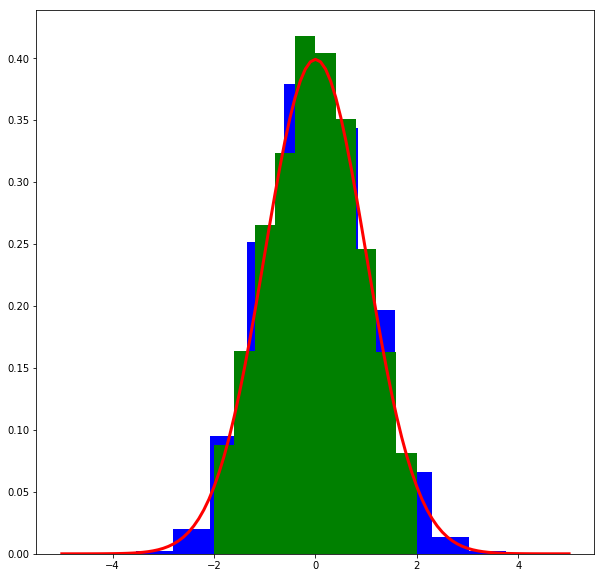

In [2]:
%matplotlib inline
import rnn_code.theory_plot_code as tpc

tpc.plot_truncated_gaussian_samples(0.0, 1.0)

## 4.3 Allgemeine Implementierungen für RNNs
<br>

<div style="text-align: justify">
Alle Implementierungen basieren auf Prof. Dr. Christian Hertas Code für [RNNs](http://www.christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/recurrentNeuralNetworks.php), [LSTMs](http://www.christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/LSTM.php) und der [Reber Grammatik](http://www.christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/reberGrammar.php). Die Formeln für die RNN-, LTSM- und GRU-Zellen wurden größtenteils [Christopher Olah Blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) entnommen. Für die RNN-Schleifen wurde auf Tensorflows [Scan-Operator](https://www.tensorflow.org/api_docs/python/tf/scan) zurückgegriffen. Dieser funktioniert ähnlich dem Fold-Operator aus der funktionalen Programmierung. Jedoch werden die einzelnen Zwischenergebnisse der Ausgabe des Scan-Operators hinzugefügt, genau das Verhalten, welches bei RNNs notwendig ist. Folgend ein vereinfachtes Klassendiagramm der Implementierung mit allen wichtigen Methoden und Attributen.
</div>

![](images/code_class_diagram.svg)
<br />

<div style="text-align: justify">
Alle speziellen RNN Implementierungen erben von der _AbstractRNN_ Klasse. Diese implementiert alle allgemeingültigen Methoden wie z.B. das Training, das Sampling oder die Prediction. Auch wird hier der Prototyp der RNN-Zellen-Methoden angegeben. Diese Zellen-Methode muss von jeder ableitenden Klasse implementiert werden. Die jeweilige Implementierung kümmert sich dann um ihre spezielle Zelle z.B. implementiert die Klasse LSTM die RNN-Zelle nach dem LSTM-Ansatz.
</div>

### 4.3.1 Training
<br>

<div style="text-align: justify">
Aufgrund der unterschiedlichen Sequenzlängen der einzelnen Trainingsbeispiele wird auf Basis des Online-Learnings trainiert. Dies war die erste Idee zu der Problematik und eine recht schnelle Methode zur Implementierung des Trainings. Aufgrund des größeren Overheads, durch das Kopieren auf und zurück in den RAM, verlangsamt diese Methode das Training jedoch. Ein Hinweis von Prof. Dr. Christian Herta war, dass in solchen Fällen einfach die längste Eingabesequenz als Vorbild genutzt wird und die restlichen Trainingsdaten um $\vec 0$ der jeweiligen Sequenzlängendifferenz erweitert werden. Dieser Ansatz wurde jedoch noch nicht weiter verfolgt. Wenn das Training abgeschlossen wurde wird unter dem Pfad in ```self.save_file``` das Model gespeichert. Ebenso werden Tensorboard Log-Files unter __logs/__ erstellt.
</div>

### 4.3.2 Prediction
<br>

<div style="text-align: justify">
Zur Prediction ist nicht viel zu schreiben. Diese erhält eine komplette Eingabesequenz und berechnet die Ausgabe des jeweiligen RNNs. Das Wichtigste was sich hier zu merken ist ist, dass vom Netz keine direkte Reber Grammatik Zeichenkette vorhergesagt wird. Die einzelnen Ausgabesequenzen sagen aus mit welcher Wahrscheinlichkeit man vom aktuellen Knoten im Graphen, bei dem man sich befindet, welche Kante nutzen kann. Das ist auch der Grund warum in den Ausgabesequenzen mehr als nur eine Stelle nahe oder sogar direkt 1 sein kann, man kann von den meisten Knoten des Reber Grammatik Graphen über zwei Kanten zu einem nächsten Knoten gelangen.
</div>

### 4.3.3 Sampling
<br>

<div style="text-align: justify">
Um Reber Grammatik Zeichenketten mit dem RNN erstellen zu können, muss mit dem RNN gesamplet werden können. Dies wurde, wie im Kapitel Grundlagen bereits beschrieben, implementiert. Als Eingabesequenz sollte ein $\vec B$ verwendet werden. Der Vokabularvektor wie auch der $\vec B$ (der erste Eingabevektor) können der folgenden Abbildung entnommen werden. In der Implementierung wird also kein Softmax verwendet, deshalb müssen die Ausgabesequenzen für die Wahrscheinlichkeiten (__p__) für $np.random.choice(...,\; p)$ normiert werden. Hierfür wird die Ausgabesequenz durch die Summe der Einzelwerte geteilt, z.B. für $y^{<1>}$: 

$$\vec p = y^{<1>} / \sum^n_{i=1} y^{<1>}_i$$
<br>

Anhand dieser Wahrscheinlichkeiten wird dann die Eingabe für den nächsten Timestep bestimmt. Dieser Vorgang wird so lange wiederholt, bis die erwartete Endsequenz vom RNN ausgegeben wird. Auch diese kann der folgenden Abbildung entnommen werden. Bei der Vorhersage der nächsten Sequenz werden jeweils die kompletten bisherigen ausgewählten Sequenzen als Eingabesequenzen für das RNN verwendet. Nur die neuste Ausgabesequenz wird dann jeweils betrachtet und der Ausgabezeichenkette hinzugefügt. Bereits hinzugefügte Sequenzen zu einem Timestep werden nicht noch einmal betrachtet, bedeutet das die Sequenz für den zweiten Timestep nur einmal der Ausgabezeichenkette hinzugefügt wird, auch wenn diese vom RNN bei weiteren Durchläufen wieder vom Neuen ausgegeben wird. Dieser Ablauf kann dem folgenden Bild entnommen werden.
</div>


![Reber Grammar](images/rnn_sample_example.svg)
<br>

## 4.4 RNN Implementierung
<br>

<div style="text-align: justify">
Alle verschiedenen RNN-Arten nutzen die $Cross-Entropy$ als Kostenfunktion:
</div>

* N $\hat{=}$ Anzahl der Trainingsbeispiele, da Online-Learning verwendet wird ist N = 1
* T $\hat{=}$ Sequenzlänge
* K $\hat{=}$ Länge der einzelnen Sequenzelemente, hier immer 7 da die Reber Grammatik aus 7 verschiedene Zeichen besteht
* $\epsilon \; \hat{=}$ Nummerischer Stabilisator damit nicht der $log()$ von 0 berechnet wird 

$$L = -{1 \over N} \cdot {\sum^N_{n=1}{\sum^T_{t=1} {\sum_{k=1}^K y^{<t>[n]}_k \cdot log(out^{<t>[n]}_k + \epsilon) + (1 - y^{<t>[n]}_k) \cdot log(1 - out^{<t>[n]}_k + \epsilon)}}}$$
<br>

<div style="text-align: justify">
Wobei $out^{<t>}$ die jeweilige Ausgabe zum Zeitpunkt $t$ darstellt und $y^{<t>}$ das jeweilige Label. $[n]$ ist der Index vom jeweiligen Trainingsbeispiel aus den Trainingsdaten. Als $h^{<t>}$ wird der Zellzustand zum Zeitpunkt $t$ der RNN-Zelle bezeichnet.
</div>
<br>

<div style="text-align: justify">
Die RNN-Zelle ist, wie in den Grundlagen beschrieben, implementiert. Die Formeln der Berechnungen sehen wie folgt aus:
</div>

Hidden-State: $$h^{<t>} = tanh(W_{hi} \cdot x^{<t>} + W_{hh} \cdot h^{<t-1>} + b_h)$$
Output: $$out^{<t>} = sigmoid(W_{oh} \cdot h^{<t>} + b_o)$$
<br>

<div style="text-align: justify">
Im Code wird hierfür die von AbstractRNN vererbte Methode rnn_cell(...) implementiert. Die Implementierung arbeitet genau wie die Formeln es vorgeben. Die Methode erhält als Parameter zuerst die vorherige Ausgabe der RNN-Zelle. Dies ist ein Tupel bestehend aus dem vorherigen Hidden-State und der vorherigen Prediction. Von diesem Tupel ist jedoch für die weiteren Berechnungen nur der vorherige Hidden-State interessant. Dann erfolgen die Berechnungen wie in den Formeln definiert und das Ausgabetupel wird zurück gegeben. Dieses enthält den aktuellen Hidden-State und die Prediction. Folgend der Code:
</div>

```python
def rnn_cell(self, _out, x_t):
    (h_tm1, _) = _out
    h_t = tf.tanh(tf.matmul(tf.expand_dims(x_t, 0), self.tf_W_ih) + 
                  tf.matmul(tf.expand_dims(h_tm1, 0), self.tf_W_hh) + 
                  self.tf_b_h)
    out_t = tf.sigmoid(tf.matmul(h_t, self.tf_W_ho) + self.tf_b_o)

    return tf.reshape(h_t, [self.n_hid]), tf.reshape(out_t, [self.n_out])
```

<div style="text-align: justify">
Folgend eine kleine Demonstration des RNNs. Zuerst wird ein RNN-Objekt erstellt, dann die Genauigkeit des Samplings über 100 Samples berechnet und zum Schluss werden noch einmal fünf Beispielwörter überprüft.
</div>

In [2]:
import rnn_code.reberGrammar as rg
import rnn_code.RNN as RNN
import numpy as np
import os

rnn = RNN.RNN();
rnn.save_file = os.path.join(os.path.dirname(rnn.save_file), "../tf_save_rnn_100%/rnn.chkp")

acc = RNN.get_rg_sample_accuracy(rnn)

start_sequence = np.asarray([[1., 0., 0., 0., 0., 0., 0.]], dtype=np.float32)
end_sequence = np.asarray([[0., 0., 0., 0., 0., 0., 1.]], dtype=np.float32)

samples = rnn.sample(start_sequence, end_sequence, n=5)

print("")

for sample in samples:
    word = rg.sequenceToWord(sample)
    print("{} in grammar: {}".format(word, rg.in_grammar(word)))

Sample acc: 100.0% over 100 samples
Duration: 2.4402809143066406sec

BTXSE in grammar: True
BPTVVE in grammar: True
BPTTVVE in grammar: True
BPTTVPXTVPXVPSE in grammar: True
BTXXTTTVPXVVE in grammar: True


<div style="text-align: justify">
Leider sieht das Ergebnis bei der embedded Reber Grammatik schon ganz anders aus. Das Training wurde mit 1000 Trainingsdaten durchgeführt bei 200 Epochen. Auch ein Fine-Tuning der Gewichtungen über weitere hunderte Epochen brachte keinen Erfolg. Die  Langzeitabhängigkeit der embedded Reber Grammatik konnte von einem normalen RNN nicht gelernt werden. Bei der Auswahl des passenden vorletzten Zeichens zum zweiten Zeichen der Zeichenkette ist das Ergebnis ein Raten mit einer ca. 50:50 Chance. Folgend ein Sampling-Beispiel eines RNNs für die embedded Reber Grammatik:
</div>

In [4]:
import rnn_code.reberGrammar as rg
import rnn_code.RNN as RNN
import numpy as np
import os

rnn = RNN.RNN();
rnn.save_file = os.path.join(os.path.dirname(rnn.save_file), "../tf_save_rnn_embedded_46%/rnn.chkp")

acc = RNN.get_rg_sample_accuracy(rnn, end_count=2)

start_sequence = np.asarray([[1., 0., 0., 0., 0., 0., 0.]], dtype=np.float32)
end_sequence = np.asarray([[0., 0., 0., 0., 0., 0., 1.]], dtype=np.float32)

samples = rnn.sample(start_sequence, end_sequence, n=10, end_count=2)

print("")

for sample in samples:
    word = rg.sequenceToWord(sample)
    print("{} in grammar: {}".format(word, rg.in_embedded_grammar(word)))

Sample acc: 50.0% over 100 samples
Duration: 6.140004873275757sec

BTBTXSXSVPSXXVPXVPXVPXTVVEPE in grammar: False
BTBPVPXVVETE in grammar: True
BTBTSSXXTVPSETE in grammar: True
BTBTXXTTVVEPE in grammar: False
BPBTSXXTVVEPE in grammar: True
BPBTSXSETE in grammar: False
BPBTXXVVETE in grammar: False
BTBTXSSSSXSETE in grammar: False
BPBPTTVPXVVEPE in grammar: True
BPBTSSSXXTVPXVPSEPE in grammar: True


## 4.5 LSTM Impementierung
<br>

<div style="text-align: justify">
Das LSTM wurde, wie bereits beschrieben, auf Basis von [Christopher Olah Blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) implementiert. Tests mit der normalen Reber Grammatik wurden nicht weiter durchgeführt, da mit dem LSTM die Langzeitabhängigkeit der embedded Reber Grammatik überprüft werden sollte. Auch bei der GRU wurden keine großen Tests zur normalen Reber Grammatik durchgeführt. Die Peephole-Connections, wie bei [Prof. Dr. Christian Herta](http://www.christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/LSTM.php) beschrieben wurden in der Implementierung weggelassen.
</div>

Formeln der Berechnungen:

Forget-Gate: $$f^{<t>} = sigmoid(W_{fx} \cdot x^{<t>} + W_{fh} \cdot h^{<t-1>} + b_f)$$

Input-Gate: $$i^{<t>} = sigmoid(W_{ix} \cdot x^{<t>} + W_{ih} \cdot h^{<t-1>} + b_i)$$

Cell-Candidate: $$CC^{<t>} = tanh(W_{cx} \cdot x^{<t>} + W_{ch} \cdot h^{<t-1>} + b_c)$$

Cell-State: $$C^{<t>} = C^{<t-1>} \odot f^{<t>} + CC^{<t>} \odot i^{<t>}$$

Output-Gate: $$o^{<t>} = sigmoid(W_{ox} \cdot x^{<t>} + W_{oh} \cdot h^{<t-1>} + b_o)$$

Hidden-State: $$h^{<t>} = tanh(C^{<t>} \odot o^{<t>})$$

Output: $$out^{<t>} = sigmoid(W_{outh} \cdot h^{<t>} + b_{out})$$
<br>

<div style="text-align: justify">
Auch bei der LSTM Implementierung wird die von AbstractRNN vererbte Methode rnn_cell(...) implementiert. Die Formeln geben wieder einmal vor wie der Rumpf der Methode auszusehen hat. Die Methode erhält als Parameter zuerst die vorherige Ausgabe der RNN-Zelle, dies ist ein Tupel bestehend aus dem vorherigen Hidden-State, Cell-State und der vorherigen Prediction. Vom Tupel ist jedoch für die weiteren Berechnungen nur der vorherige Hidden-State und Cell-State interessant. Dann erfolgen die Berechnungen wie in den Formeln definiert und das Ausgabetupel wird zurück gegeben. Dieses enthält den aktuellen Hidden-State, Cell-State und die Prediction. Folgend der Code:
</div>

```python
def rnn_cell(self, _out, x_t):
    h_tm1, c_tm1, _ = _out

    f_t = tf.sigmoid(tf.matmul(tf.expand_dims(x_t, 0), self.tf_W_fx) +
                     tf.matmul(tf.expand_dims(h_tm1, 0), self.tf_W_fh) +
                     self.tf_b_f)

    i_t = tf.sigmoid(tf.matmul(tf.expand_dims(x_t, 0), self.tf_W_ix) +
                     tf.matmul(tf.expand_dims(h_tm1, 0), self.tf_W_ih) +
                     self.tf_b_i)

    cc_t = tf.tanh(tf.matmul(tf.expand_dims(x_t, 0), self.tf_W_cx) +
                   tf.matmul(tf.expand_dims(h_tm1, 0), self.tf_W_ch) +
                   self.tf_b_c)

    c_t = tf.multiply(c_tm1, f_t) + tf.multiply(cc_t, i_t)

    o_t = tf.sigmoid(tf.matmul(tf.expand_dims(x_t, 0), self.tf_W_ox) +
                     tf.matmul(tf.expand_dims(h_tm1, 0), self.tf_W_oh) +
                     self.tf_b_o)

    h_t = tf.multiply(tf.tanh(c_t), o_t)

    out_t = tf.sigmoid(tf.matmul(h_t, self.tf_W_outh) + self.tf_b_out)

    return tf.reshape(h_t, [self.n_hid]), tf.reshape(c_t, [self.n_hid]), tf.reshape(out_t, [self.n_out])
```

<div style="text-align: justify">
Folgend wieder der schon durchgeführte Testlauf wie auch beim normalen RNN. Das LSTM-Objekt wird erstellt, die Model-Datei angegeben und dann die Genauigkeitsprüfung des Samplings durchgeführt. Anhand der Ausgabe ist zu erkennen, dass das LSTM eine ungefähre Sampling-Genauigkeit ausweist von ca. 95%. Hier wird aufgrund des Zeitaufwands nur mit 100 Samplingdaten gearbeitet. In den allgemeinen Tests wurden auch 10000++ Samplingdaten erstellt und überprüft. Auch dort wurde eine Genauigkeit von ca. 95% ausgegeben.
</div>

In [5]:
import rnn_code.reberGrammar as rg
import rnn_code.RNN as RNN
import numpy as np
import os

lstm = RNN.LSTM();
lstm.save_file = os.path.join(os.path.dirname(rnn.save_file), "../tf_save_lstm_95%/lstm.chkp")

acc = RNN.get_rg_sample_accuracy(lstm, end_count=2)

start_sequence = np.asarray([[1., 0., 0., 0., 0., 0., 0.]], dtype=np.float32)
end_sequence = np.asarray([[0., 0., 0., 0., 0., 0., 1.]], dtype=np.float32)

samples = lstm.sample(start_sequence, end_sequence, n=10, end_count=2)

print("")

for sample in samples:
    word = rg.sequenceToWord(sample)
    print("{} in grammar: {}".format(word, rg.in_embedded_grammar(word)))

Sample acc: 95.0% over 100 samples
Duration: 7.170077562332153sec

BPBTSSSXSEPE in grammar: True
BTBTXXVVETE in grammar: True
BPBTSXSEPE in grammar: True
BTBPTVPSETE in grammar: True
BTBPVPXTVVETE in grammar: True
BPBTXSEPE in grammar: True
BTBTSXXVVETE in grammar: True
BTBTSXXTVVETE in grammar: True
BPBPTVPSEPE in grammar: True
BTBTSSSSSSXSETE in grammar: True


Der Graph der Trainingskosten sah wie folgt aus:

![lstm train cost](images/lstm_train_cost.png)

## 4.6 GRU Implementierung
<br>

<div style="text-align: justify">
Auch das GRU wurde, wie bereits im Grundlagenkapitel beschrieben, implementiert. Die Notation weicht etwas von der in den Grundlagen ab. Jedoch sind die in diesem Kapitel zu findenden Notationen genau so, wie sie auch in der Implementierung verwendet wurden. Diese Notation wurde verwendet um im Code eine gewisse Einheitlichkeit bei den Bezeichnungen zwischen den verschiedenen RNN-Zellen zu gewährleisten. Die einzelnen Gates werden hier nicht noch einmal beschrieben, da dafür das Grundlagenkapitel genutzt wurde. Das ist ebenfalls der Grund warum im vorherigen LSTM Implementierungskapitel nichts weiter dazu geschrieben wurde. Jedoch ist es praktisch die einzelnen Formeln noch einmal zu sehen.
</div>

Formeln der Berechnungen:

Update-Gate: $$u^{<t>} = sigmoid(W_{ux} \cdot x^{<t>} + W_{uh} \cdot h^{<t-1>} + b_u)$$

Relevance-Gate: $$r^{<t>} = sigmoid(W_{rx} \cdot x^{<t>} + W_{rh} \cdot h^{<t-1>} + b_r)$$

Hidden-State-Candidate: $$hc^{<t>} = tanh(W_{hcx} \cdot x^{<t>} + W_{hch} \cdot (r^{<t>} \odot h^{<t-1>}) + b_{hc})$$

Hidden-State: $$h^{<t>} = u^{<t>} \odot hc^{<t>} + (1 - u^{<t>}) \odot h^{<t-1>}$$

Output: $$out^{<t>} = sigmoid(W_{outh} \cdot h^{<t>} + b_{out})$$
<br>

<div style="text-align: justify">
Bei der GRU Implementierung ist wieder das gleiche Muster zu erkennen. Die von AbstractRNN vererbte Methode rnn_cell(...) wird anhand der Formeln implementiert. Die Methode erhält wieder als ersten Parameter die vorherige Ausgabe der RNN-Zelle. Dies ist ein Tupel bestehend aus dem vorherigen Hidden-State und der vorherigen Prediction. Auch hier ist vom Tupel nur der Hidden-State für die weiteren Berechnungen wichtig. Es erfolgen die Berechnungen wie in den Formeln definiert und das Ausgabetupel wird zurück gegeben. Dieses enthält den aktuellen Hidden-State und die Prediction, genau wie in der RNN Implementierung. Folgend der Code:
</div>

```python
def rnn_cell(self, _out, x_t):
    h_tm1, _ = _out

    u_t = tf.sigmoid(tf.matmul(tf.expand_dims(x_t, 0), self.tf_W_ux) +
                     tf.matmul(tf.expand_dims(h_tm1, 0), self.tf_W_uh) +
                     self.tf_b_u)

    r_t = tf.sigmoid(tf.matmul(tf.expand_dims(x_t, 0), self.tf_W_rx) +
                     tf.matmul(tf.expand_dims(h_tm1, 0), self.tf_W_rh) +
                     self.tf_b_r)

    hc_t = tf.tanh(tf.matmul(tf.expand_dims(x_t, 0), self.tf_W_hcx) +
                   tf.matmul(tf.multiply(tf.expand_dims(h_tm1, 0), r_t), self.tf_W_hch) +
                   self.tf_b_hc)

    h_t = tf.multiply(u_t, hc_t) + tf.multiply(1 - u_t, h_tm1)

    out_t = tf.sigmoid(tf.matmul(h_t, self.tf_W_outh) + self.tf_b_out)

    return tf.reshape(h_t, [self.n_hid]), tf.reshape(out_t, [self.n_out])
```

<div style="text-align: justify">
Die GRU wird folgend genau so getestet wie auch die anderen Implementierungen der RNN-Zellen. Zuerst wird das GRU-Objekt erstellt, dann die Model-Datei angegeben und die Sampling-Tests durchgeführt. Auch hier nur mit 100 Samplings, wegen dem Zeitaufwand. Sowohl bei 10000 Samplings wie auch bei 100000 Samplings erreichte das GRU eine 100% Genauigkeit. Selbst nachdem mit dem LSTM über mehrere hunderte Epochen Fine-Tuning durchgeführt wurden, erreichte das LSTM nie eine Genauigkeit von 100%. Jedoch soll die Auswertung der RNN-Zellen noch nicht hier passieren, doch es ist einfach schon einmal erwähnenswert.
</div>

In [6]:
import rnn_code.reberGrammar as rg
import rnn_code.RNN as RNN
import numpy as np
import os

gru = RNN.GRU();
gru.save_file = os.path.join(os.path.dirname(rnn.save_file), "../tf_save_gru_100%/gru.chkp")

acc = RNN.get_rg_sample_accuracy(gru, end_count=2)

start_sequence = np.asarray([[1., 0., 0., 0., 0., 0., 0.]], dtype=np.float32)
end_sequence = np.asarray([[0., 0., 0., 0., 0., 0., 1.]], dtype=np.float32)

samples = gru.sample(start_sequence, end_sequence, n=10, end_count=2)

print("")

for sample in samples:
    word = rg.sequenceToWord(sample)
    print("{} in grammar: {}".format(word, rg.in_embedded_grammar(word)))

Sample acc: 100.0% over 100 samples
Duration: 6.589985370635986sec

BTBPVPXVVETE in grammar: True
BTBPVVETE in grammar: True
BTBTXSETE in grammar: True
BPBPVPXVVEPE in grammar: True
BTBTSXSETE in grammar: True
BTBTSSSSSSXXVPSETE in grammar: True
BTBPTVPSETE in grammar: True
BPBPTTVVEPE in grammar: True
BTBPVPSETE in grammar: True
BPBPVPXTVVEPE in grammar: True


Der Graph der Trainingskosten sah wie folgt aus:

![GRU train cost](images/gru_train_cost.png)

# 5 Auswertung
<br>

<div style="text-align: justify">
Da es im diesem ICW ja darum ging die Theorie zu studieren und RNNs im allgemeinen zu verstehen ist nicht wirklich viel auszuwerten. Wie sich nach den Tests bestätigte, haben normale RNNs aufgrund des verschwindenden Gradienten ein Problem damit selbst kurzfristige Langzeitabhängigkeiten, wie die embedded Reber Grammatik, zu lernen. Die RNN-Zellen der früheren Timesteps haben sehr geringen bis gar keinen Einfluss auf die Vorhersagen des späteren RNN-Zellen. Der Gradient für die früheren RNN-Zellen wird durch die aufeinander folgenden Multiplikationen immer kleiner und kann eben gegen Null gehen. Somit haben diese keinen Einfluss auf die späteren Vorhersagen. Dies ist jedoch wichtig bei Problemen wie die embedded Reber Grammatik. LSTMs und GRUs haben durch ihre Gates hier den Vorteil, dass sie RNN-Zellen "überspringen" können und somit bei der Gradientenberechnung nicht immer wieder Terme zwischen $-0.01 \; bis \; 0.01$ oder kleiner vorkommen. Genau diese sind es die den Gradienten immer weiter verschwinden lassen.
<br><br>

Wie den Tests im Implementierungskapitel zu entnehmen ist, konnte ein normales RNN die einfache Reber Grammatik lernen und eine ca. 100% Sample-Genauigkeit erreichen. Bei der embedded Reber Grammatik war dies auch nach vielen Epochen des Trainings nicht möglich. Hier erreichte ein RNN nur eine Sample-Genauigkeit von ca. 50%, die Langzeitabhängigkeit des Verbindens des zweiten Zeichens der Zeichenkette mit dem Vorletzten wurde nicht gelernt. Das RNN riet an der vorletzten Stelle zwar die an sich richtigen Zeichen, nähmlich $T$ oder $P$, jedoch standen diese in keinem Zusammenhang mit dem zweiten Zeichen der Zeichenkette.
<br><br>

Hingegen konnten LSTM und GRU die Langzeitabhängigkeit lernen. Wie wiederum den Tests zu entnehmen ist, erreichte das LSTM eine Sample-Genauigkeit von ca. 95% und die GRU sogar eine Genauigkeit von ca. 100%. Wichtig zu erwähnen ist jedoch, dass die Ausbeute bei Sampling nicht gerade sehr hoch ist, dies kann [_ICW1_Code.ipynb](_ICW1_Code.ipynb) entnommen werden. Wenn mit dem LSTM oder der GRU 10000 Samples erstellt wurden, wurden ca. 1000 einzigartige Samples erstellt. Daher müsste nun validiert werden, ob die einzelnen RNNs auch wirklich lernen wie sie von einem Weg im Graphen über welche Kanten weiter gelangen oder ob sie nur eine gewisse Menge an Beispielen auswendig lernen. Ebenso wichtig ist anzumerken, dass diese geringer Anzahl an Beispielen eben die wahrscheinlichsten Zeichenketten sind und somit oft doppelt ausgegeben werden. Dieses Verhalten ist jedoch auch schon der Erstellung der Trainingsdaten zu entnehmen, wenn z.B. 50000 Trainingsdaten erstellt werden sind ca. 5000 davon einzigartig. Da das Erstellen der Trainingdaten auf Basis des Zufalls passiert. Daher sollten diese Genauigkeitswerte mit Vorsicht betrachtet werden. 
<br><br>

Als Loss-Funktion wurde auch ```tf.nn.softmax_cross_entropy_with_logits_v2(...)``` getestet. Es brachte keinen Unterschied in Hinsicht der Leistung der Netze. Der einzig wirklich bemerkbare Unterschied war, dass die Kosten nie gegen Null gingen. Dies ist natürlich beim Einsatz von Softmax nicht weiter verwunderlich, da die Ausgabesequenzen ja nicht komplett One-Hot-Encoded sind. Es sind meist Label-Vektoren mit mindestens zwei $1$'ern im Vektor und Softmax kann nur Vektoren ausgeben, bei denen an zwei Stellen ein Wert nahe $0.5$ steht. Dann mit der $Cross-Entropy$ mit einer Differenz von ca. 0.5 zu arbeiten ergibt zwangsweise höhere Kosten. Jedoch dem Sampling an sich schadet dieses Verhalten nicht, deshalb konnte auch Softmax verwendet werden.
<br><br>

In Hinsicht der Regularisierung und des Exploding Gradient Problems wurden testweise L2-Regulariesierung und Gradient-Clipping implementiert. Diese Implementierungen sind auch noch immer im Code enthalten nur auskommentiert. Der Grund dafür ist, dass beide Verfahren keinen wirklichen Mehrwert brachten. Das Gradient-Clipping brachte gar nichts, da kein Exploding Gradient Problem auftrat. Die L2-Regularisierung sorge nur dafür, dass das Lernen der RNNs verhindert oder sehr stark abgeschwächt wurde. Nur wenn ein $\lambda$ von z.B. $0.00001$ gewählt wurde waren die RNNs imstande etwas zu lernen, also wenn die L2-Regularisierung fast komplett abgeschaltet wurde. Auch weisen der [stackexchange.com Post von Sycorax (2017)](https://stats.stackexchange.com/a/275088) und die Ausarbeitung von [Bengio, et al. (1993)](https://arxiv.org/pdf/1211.5063.pdf) darauf hin, dass Regularisierung von RNN-Zellen einen meist eher negativen Effekt haben.
<br><br>

Abschließend ist nur noch zu schreiben das der Artikel ["The fall of RNN / LSTM" von Eugenio Culurciello (2018, besucht am 15.02.2019)](https://towardsdatascience.com/the-fall-of-rnn-lstm-2d1594c74ce0) mich stutzig gemacht hat ob RNNs heute überhaupt noch die erste Wahl sind wenn es darum geht sequenzielle Probleme zu lösen oder ob man heutzutage nicht eher Attention-Models nutzen sollte. Genaueres kann ich dazu jedoch noch nicht sagen, da ich mich noch nicht in die Attention-Models eingearbeitet habe und ich daher nicht weiß ob sie generell besser darin sind Langzeitabhänigkeiten zu lernen oder nur in bestimmten Einsatzgebieten besser funktionieren, wie z.B. dem Natural Language Processing. Auf jeden Fall sollte sich diese Art der sequenziellen Problemlöser angeguckt und überprüft werden.
</div>

# 6 Quellen
<br>

## 6.1 Literaturverzeichnis
<table>
    <tr>
        <td>
            <a name="CHO14"></a>[CHO14]
        </td>
        <td>
            Cho, Kyunghyun, et al. "Learning phrase representations using RNN encoder-decoder for statistical machine translation." arXiv preprint [arXiv:1406.1078](https://arxiv.org/pdf/1406.1078v3.pdf) (2014).               
        </td>
    </tr>
    <tr>
        <td>
            <a name="HOC97"></a>[HOC97]
        </td>
        <td>
            Hochreiter, Sepp, and Jürgen Schmidhuber. "Long short-term memory." Neural computation 9.8 (1997): [1735-1780](http://www.bioinf.jku.at/publications/older/2604.pdf).
        </td>
    </tr>
    <tr>
        <td>
            <a name="LIP15"></a>[LIP15]
        </td>
        <td>
            Z. C. Lipton, J. Berkowitz und C. Elkan. „A Critical Review of Recurrent Neural Networks for Sequence Learning“. [arXiv:1506.00019](https://arxiv.org/abs/1506.00019) (Okt. 2015).
        </td>
    </tr>
</table>

## 6.2 Webverzeichnis

<table>
    <tr>
        <td>
            <a name="DEE18"></a>[DEE18]
        </td>
        <td>
            HTW deep.TEACHING. Besucht 2018, Oktober 20. NeuroRace https://gitlab.com/NeuroRace
        </td>
    </tr>
    <tr>
        <td>
            <a name="EVO18"></a>[EVO18]
        </td>
        <td>
            evolvingstuff. Besucht 2018, November 30. How do GRUs solve the vanishing gradient problem? https://www.reddit.com/r/MachineLearning/comments/3h4tuy/how_do_grus_solve_the_vanishing_gradient_problem/
        </td>
    </tr>
    <tr>
        <td>
            <a name="NG18a"></a>[NG18a]
        </td>
        <td>
            Andrew Ng, et al. Besucht 2018, Oktober 25. deeplearning.ai Sequence Models https://www.coursera.org/lecture/nlp-sequence-models/why-sequence-models-0h7gT
        </td>
    </tr>
    <tr>
        <td>
            <a name="NG18b"></a>[NG18b]
        </td>
        <td>
            Andrew Ng, et al. Besucht 2018, Oktober 25. deeplearning.ai Sequence Models https://www.coursera.org/lecture/nlp-sequence-models/notation-aJT8i
        </td>
    </tr>
    <tr>
        <td>
            <a name="NG18c"></a>[NG18c]
        </td>
        <td>
            Andrew Ng, et al. Besucht 2018, Oktober 25. deeplearning.ai Sequence Models https://www.coursera.org/lecture/nlp-sequence-models/recurrent-neural-network-model-ftkzt
        </td>
    </tr>
    <tr>
        <td>
            <a name="NG18d"></a>[NG18d]
        </td>
        <td>
            Andrew Ng, et al. Besucht 2018, Oktober 25. deeplearning.ai Sequence Models https://www.coursera.org/lecture/nlp-sequence-models/backpropagation-through-time-bc7ED
        </td>
    </tr>
    <tr>
        <td>
            <a name="NG18e"></a>[NG18e]
        </td>
        <td>
            Andrew Ng, et al. Besucht 2018, Oktober 25. deeplearning.ai Sequence Models https://www.coursera.org/lecture/nlp-sequence-models/different-types-of-rnns-BO8PS
        </td>
    </tr>
    <tr>
        <td>
            <a name="NG18f"></a>[NG18f]
        </td>
        <td>
            Andrew Ng, et al. Besucht 2018, Oktober 25. deeplearning.ai Sequence Models https://www.coursera.org/lecture/nlp-sequence-models/sampling-novel-sequences-MACos
        </td>
    </tr>
    <tr>
        <td>
            <a name="NG18g"></a>[NG18g]
        </td>
        <td>
            Andrew Ng, et al. Besucht 2018, Oktober 25. deeplearning.ai Sequence Models https://www.coursera.org/lecture/nlp-sequence-models/vanishing-gradients-with-rnns-PKMRR
        </td>
    </tr>
    <tr>
        <td>
            <a name="OLA18"></a>[OLA18]
        </td>
        <td>
            Christopher Olah. Besucht 2018, November 05. Understanding LSTM Networks https://colah.github.io/posts/2015-08-Understanding-LSTMs/
        </td>
    </tr>
</table>


## 6.2 Bildverzeichnis

<table>
    <tr>
        <td>
            <a name="HER18a"></a>[HER18a]
        </td>
        <td>
            Prof. Dr. Christian Herta. Besucht 2018, Oktober 23. Reber Grammar http://www.christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/pics/reberGrammar.png
        </td>
    </tr>
    <tr>
        <td>
            <a name="OLA18a"></a>[OLA18a]
        </td>
        <td>
            Christopher Olah. Besucht 2018, Dezember 08. Understanding LSTM Networks https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png
        </td>
    </tr>
    <tr>
        <td>
            <a name="OLA18b"></a>[OLA18b]
        </td>
        <td>
            Christopher Olah. Besucht 2018, Dezember 08. Understanding LSTM Networks https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png
        </td>
    </tr>
    <tr>
        <td>
            <a name="OLA18c"></a>[OLA18c]
        </td>
        <td>
            Christopher Olah. Besucht 2018, Dezember 08. Understanding LSTM Networks https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-gate.png
        </td>
    </tr>
    <tr>
        <td>
            <a name="OLA18d"></a>[OLA18d]
        </td>
        <td>
            Christopher Olah. Besucht 2018, Dezember 08. Understanding LSTM Networks https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png
        </td>
    </tr>
    <tr>
        <td>
            <a name="OLA18e"></a>[OLA18e]
        </td>
        <td>
            Christopher Olah. Besucht 2018, Dezember 08. Understanding LSTM Networks https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png
        </td>
    </tr>
    <tr>
        <td>
            <a name="OLA18f"></a>[OLA18f]
        </td>
        <td>
            Christopher Olah. Besucht 2018, Dezember 08. Understanding LSTM Networks https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png
        </td>
    </tr>
    <tr>
        <td>
            <a name="OLA18g"></a>[OLA18g]
        </td>
        <td>
            Christopher Olah. Besucht 2018, Dezember 08. Understanding LSTM Networks https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png
        </td>
    </tr>
    <tr>
        <td>
            <a name="OLA18h"></a>[OLA18h]
        </td>
        <td>
            Christopher Olah. Besucht 2018, Dezember 08. Understanding LSTM Networks https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png
        </td>
    </tr>
</table>